In [124]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self,inplanes, planes, stride):
        super(ResidualBlock, self).__init__()
        
        self.inplanes = inplanes
        self.stride = stride
        self.planes = planes
        
        self.conv1 = nn.Conv2d(inplanes, planes, 3, stride=stride, padding=1, dilation=1, 
                               groups=1, bias=False, padding_mode='zeros')
        self.conv2 = nn.Conv2d(planes, planes, 3, stride=1, padding=1, dilation=1, 
                               groups=1, bias=False, padding_mode='zeros')
        
        self.batchNorm1 = nn.BatchNorm2d(planes)
        self.batchNorm2 = nn.BatchNorm2d(planes)     
        self.batchNormSH = nn.BatchNorm2d(planes)   
        
        self.GFunction = nn.Conv2d(inplanes, planes, 1, stride=stride, padding=0, dilation=1, 
                                   groups=1, bias=False, padding_mode='zeros')
    def forward(self, X):
        conv_layer = self.batchNorm2(self.conv2(torch.relu(self.batchNorm1(self.conv1(X)))))
        
        if self.planes != self.inplanes or self.stride > 1:
            out = torch.relu(conv_layer + self.batchNormSH(self.GFunction(X)))
            
            
        else:
            out = torch.relu(conv_layer + X)
            
        return out
        
        
        
        
        
    

In [125]:
model = ResidualBlock(3, 100, 1) #(input_planes, planes, stride)


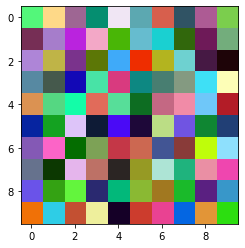

In [126]:
X = torch.randint(0, 255, (200, 3, 10, 10), dtype=torch.uint8)
plt.imshow(X[0].permute(1, 2, 0))

X = X.to(torch.float32)

out = model(X)



In [127]:
out.shape

torch.Size([200, 100, 10, 10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


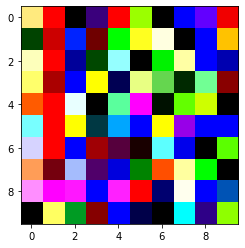

In [128]:
plt.imshow(out[0, :3].detach().permute(1, 2, 0))

In [129]:
out.dtype

torch.float32